Note: you may need to restart the kernel to use updated packages.
Path to dataset files: C:\Users\plui0\.cache\kagglehub\datasets\shayanfazeli\heartbeat\versions\1
Files in dataset folder:
['mitbih_test.csv', 'mitbih_train.csv', 'ptbdb_abnormal.csv', 'ptbdb_normal.csv']
Path to dataset files: C:\Users\plui0\.cache\kagglehub\datasets\shayanfazeli\heartbeat\versions\1
Files in dataset folder:
['mitbih_test.csv', 'mitbih_train.csv', 'ptbdb_abnormal.csv', 'ptbdb_normal.csv']
Original shape: (99195, 187)
Dropping 54 columns with ≥80.0% zeros
Dropping 54 columns with ≥80.0% zeros
132    0.793014
131    0.785372
130    0.778285
129    0.769333
128    0.760048
127    0.750451
126    0.739201
125    0.726135
124    0.714361
123    0.700055
122    0.684994
121    0.668179
120    0.650890
119    0.634578
118    0.619890
117    0.603982
116    0.589364
115    0.576219
114    0.563889
113    0.551258
dtype: float64
Original shape: (99195, 187)
Dropping 54 columns with ≥80.0% zeros
Dropping 54 colum

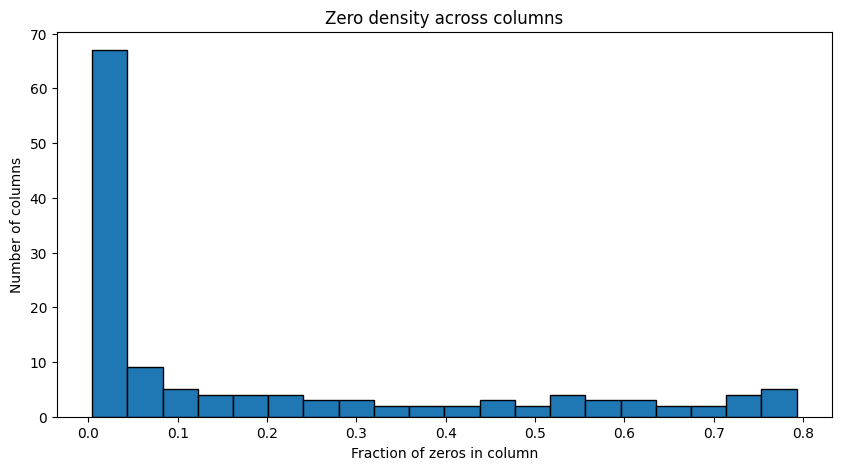

Columns with all zeros: []
Count: 0
Cleaned shape: (99195, 133)
Accuracy: 0.24843768898923518
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.17      0.29     18118
         1.0       0.13      0.49      0.21       556
         2.0       0.23      0.45      0.31      1448
         3.0       0.03      0.95      0.05       162
         4.0       0.49      0.72      0.59      1608
         6.0       0.09      0.70      0.15       834
         7.0       0.11      0.09      0.10      2077

    accuracy                           0.25     24803
   macro avg       0.28      0.51      0.24     24803
weighted avg       0.71      0.25      0.29     24803

Confusion Matrix:
 [[3169 1548 1606 4787  844 5123 1041]
 [  38  273   45  117   14   62    7]
 [  95   77  648  193  154  130  151]
 [   4    0    3  154    0    0    1]
 [  79   16   36   26 1153   82  216]
 [  24   64   58   71   16  585   16]
 [ 168  109  373  315  152  780  180]]

In [1]:
# ==================== INSTALL & SETUP ====================
# Install required packages
%pip install tensorflow --upgrade --quiet

# Run preprocessing notebook (assumes X_train, X_test, y_train, y_test exist after this)
%run FeatureEngineering.ipynb

# (Windows only) Ensure Microsoft VC++ is installed
import os
os.system("winget install -e --id Microsoft.VC++2015-2019Redist-x64")

# Verify TensorFlow
try:
    import tensorflow as tf
    print(f"TensorFlow version: {tf.__version__}")
except ImportError as e:
    print("TensorFlow failed to import. Please ensure all dependencies are installed.")
    print(e)

# ==================== IMPORT LIBRARIES ====================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# ==================== DATA PREP ====================
# Convert to arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values.astype(int)
y_test = y_test.values.astype(int)

# ==================== REMAP CLASS LABELS ====================
# Merge class 6 into 0 ("Normal"), and relabel 7 → 5 ("Abnormal")
y_train = np.where(y_train == 6, 0, y_train)
y_test = np.where(y_test == 6, 0, y_test)

y_train = np.where(y_train == 7, 5, y_train)
y_test = np.where(y_test == 7, 5, y_test)

# Check new class count
unique_classes = np.unique(np.concatenate([y_train, y_test]))
num_classes = unique_classes.max() + 1  # should be 6

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

c:\Users\plui0\anaconda3\envs\tfcpu\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 129, 32)        │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 64, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 62, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 31, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 31, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1984)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       198,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,506 (802.76 KB)

 Trainable params: 205,506 (802.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
775/775 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8253 - loss: 0.5953 - val_accuracy: 0.9010 - val_loss: 0.2963
Epoch 2/30
775/775 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8253 - loss: 0.5953 - val_accuracy: 0.9010 - val_loss: 0.2963
Epoch 2/30
775/775 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9030 - loss: 0.3053 - val_accuracy: 0.9311 - val_loss: 0.2116
Epoch 3/30
775/775 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9030 - loss: 0.3053 - val_accuracy: 0.9311 - val_loss: 0.2116
Epoch 3/30
775/775 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9228 - loss: 0.2395 - val_accuracy: 0.9469 - val_loss: 0.1646
Epoch 4/30
775/775 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9228 - loss: 0.2395 - val_accuracy: 0.9469 - val_loss: 0.1646
Epoch 4/30
775/775 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9358 - loss: 0.2005 - val_accuracy: 0.9488 - val_loss: 0.1537
Epoch 5/30
775/775 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9358 - loss: 0.2005 - val_accuracy: 

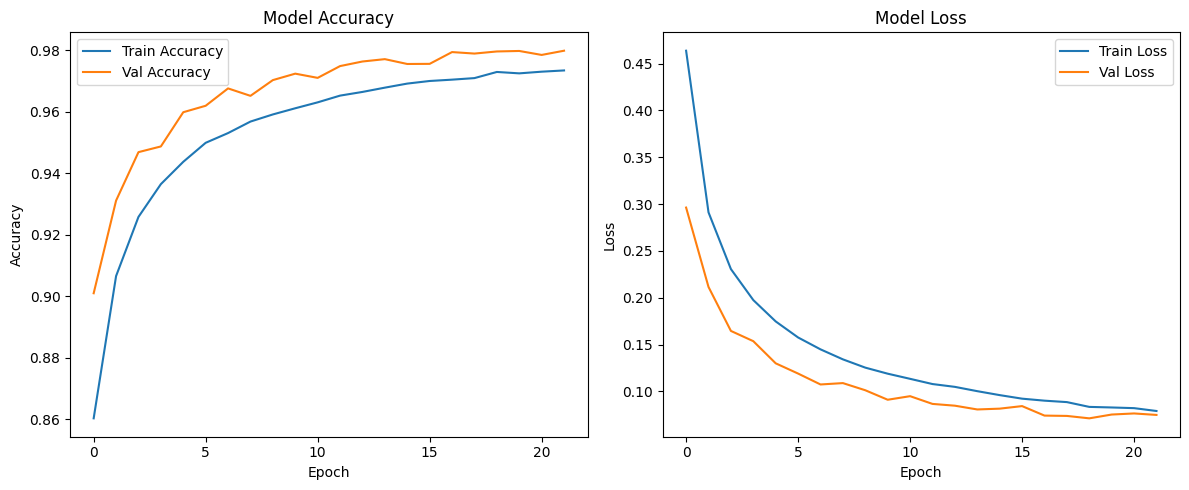

776/776 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
776/776 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


C:\Users\plui0\AppData\Local\Temp\ipykernel_23444\3634589508.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', num_classes)


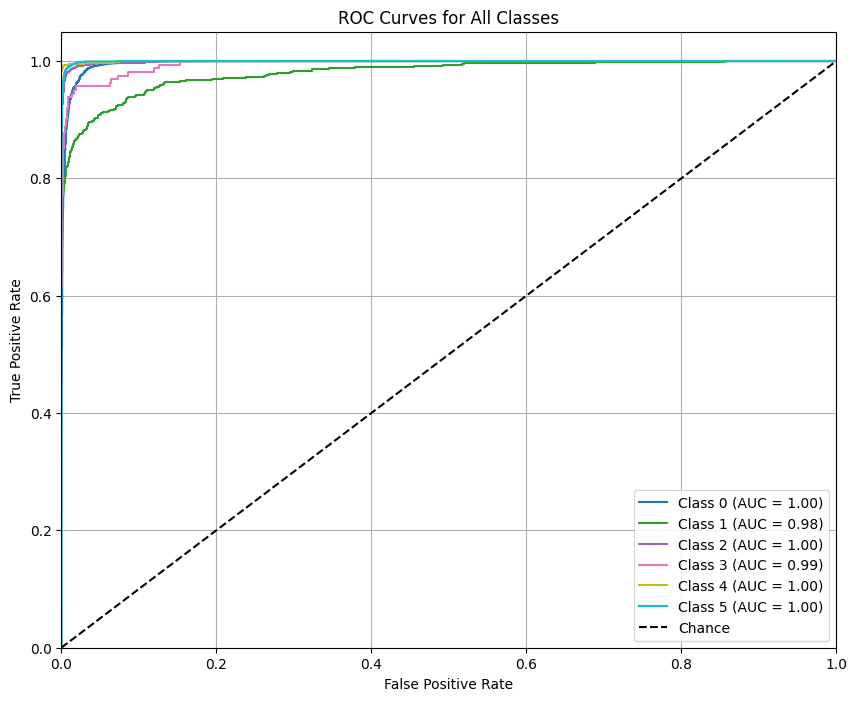

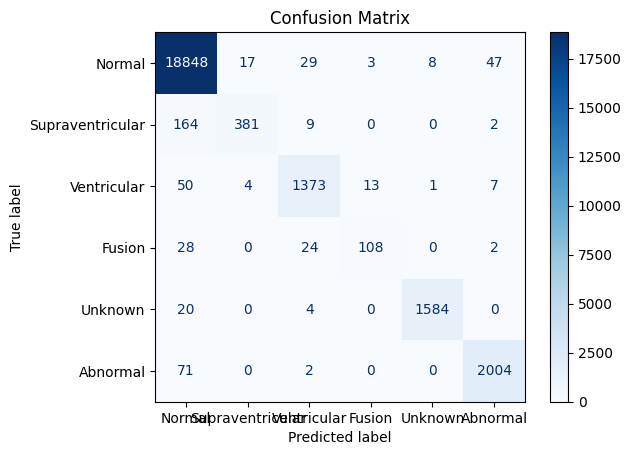

In [3]:
# ==================== BUILD CNN ====================
model = Sequential([
    Conv1D(32, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ==================== TRAIN MODEL ====================
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train_cat,
    epochs=30,
    batch_size=128,
    validation_data=(X_test, y_test_cat),
    callbacks=[early_stop],
    verbose=1
)

# ==================== EVALUATE MODEL ====================
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}")

# ==================== PREDICT & METRICS ====================
pred_classes = np.argmax(model.predict(X_test), axis=1)

print("Classification Report:\n", classification_report(y_test, pred_classes))
print("Recall (macro):", recall_score(y_test, pred_classes, average='macro'))

# ==================== PLOT TRAINING HISTORY ====================
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
# ==================== ROC & AUC CURVES ====================
# Binarize test labels for ROC computation
y_test_bin = label_binarize(y_test, classes=np.arange(num_classes))

# Predict probabilities
y_score = model.predict(X_test)

# Compute ROC and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', num_classes)

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})", color=colors(i))

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Classes')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ==================== CONFUSION MATRIX ====================
label_names = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown', 'Abnormal']

cm = confusion_matrix(y_test, pred_classes, labels=np.arange(num_classes))
cmd = ConfusionMatrixDisplay(cm, display_labels=label_names)
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()